In [36]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

#농어샘플 56개

In [37]:
from sklearn.model_selection import train_test_split
#훈련세트와 테스트 세트로 나눔
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)
print(train_input.shape, test_input.shape)
# 훈련세트와 테스트 세트를 2차원 배열로 변경
train_input =train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)
print(train_input.shape, test_input.shape)

(42,) (14,)
(42, 1) (14, 1)


In [38]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=3)

#k-최근접 이웃 회기 모델을 훈련
knr.fit(train_input,train_target)

KNeighborsRegressor(n_neighbors=3)

In [39]:
print(knr.predict([[50]]))
#길이가 50cm인 농어의 무게


[1033.33333333]


(array([[6., 7., 7.]]), array([[34,  8, 14]], dtype=int64))


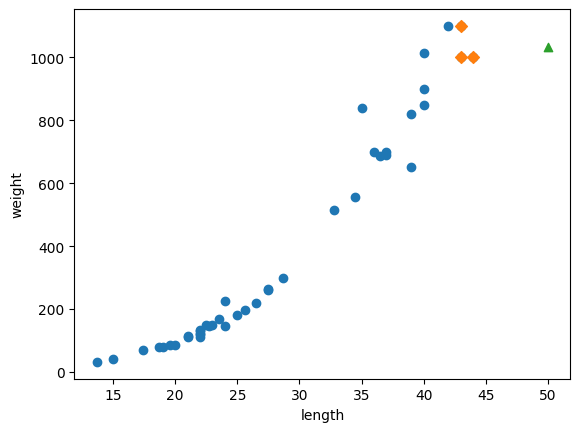

In [41]:
import matplotlib.pyplot as plt

#50cm 농어의 이웃 구하기
print(knr.kneighbors([[50]]))
distance, indexes = knr.kneighbors([[50]])
# 3개의 이웃의 대략적인 거리 6,7,7 2차원 배열 인덱스 번호 34,8,14

# 훈련세트의 산점도 그리기
plt.scatter(train_input,train_target)

# 훈련세트 중에서 이웃샘플만 다시 그리기
plt.scatter(train_input[indexes], train_target[indexes], marker="D")

#50cm 농어 데이터
plt.scatter(50,1033,marker="^")
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [43]:
#이웃 샘플의 타깃 평균
print(np.mean(train_target[indexes]))

print(knr.predict([[100]]))
# 100cm의 농어도 1033g으로 예측

1033.3333333333333
[1033.33333333]


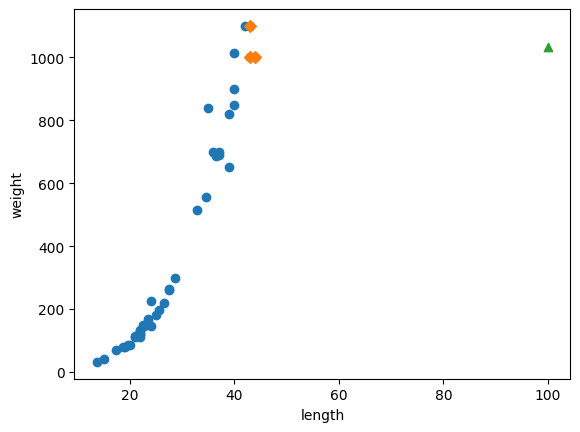

In [44]:
#100cm 농어의 이웃 구하기
distance, indexes = knr.kneighbors([[100]])
# 3개의 이웃의 대략적인 거리 6,7,7 2차원 배열 인덱스 번호 34,8,14

# 훈련세트의 산점도 그리기
plt.scatter(train_input,train_target)

# 훈련세트 중에서 이웃샘플만 다시 그리기
plt.scatter(train_input[indexes], train_target[indexes], marker="D")

#50cm 농어 데이터
plt.scatter(100,1033,marker="^")
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

## 선형 회귀 모델을 사용하기


In [45]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

#선형회귀 모델 훈련
lr.fit(train_input,train_target)

#50cm 농어 예측하기
print(lr.predict([[50]]))

[1241.83860323]


In [46]:
print(lr.coef_, lr.intercept_)
#lr.coef_ - 기울기, lr.intercept_ - 절편

[39.01714496] -709.0186449535474


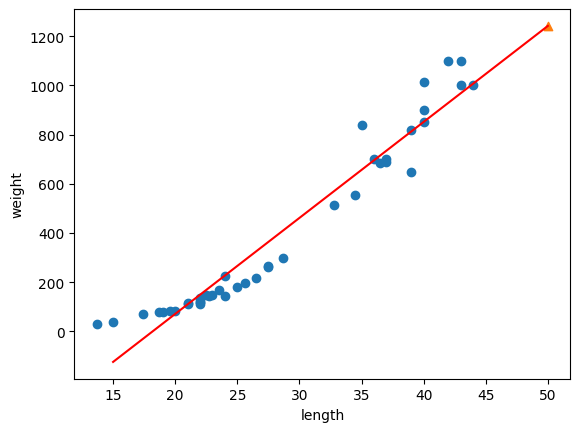

In [49]:
# 훈련세트 산점도 그리기
plt.scatter(train_input,train_target)

#15에서 50까지 1차 방정식 그래프 그리기
plt.plot([15,50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_] ,color = "red")

#50cm 농어 데이터
plt.scatter(50,1241.8, marker="^")
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [50]:
# 훈련 세트와 테스트 세트의 대한 R**2 점수 확인
print(lr.score(train_input,train_target))
print(lr.score(test_input,test_target))
#과소적합으로 새로운 데이터 잘 못맟춤


0.9398463339976041
0.824750312331356


## 다항 회기


In [51]:
train_poly = np.column_stack((train_input **2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

#농어의 길이를 제곱해서 원래 데이터 앞에 붙이기

In [52]:
print(train_poly.shape, test_poly.shape)
#열이 2개로 늘어남


(42, 2) (14, 2)


In [55]:
lr = LinearRegression()
lr.fit(train_poly,train_target)
print(lr.predict([[50**2,50]]))

[1573.98423528]


In [56]:
print(lr.coef_,lr.intercept_)
#계수와 절편 보기


[  1.01433211 -21.55792498] 116.0502107827827


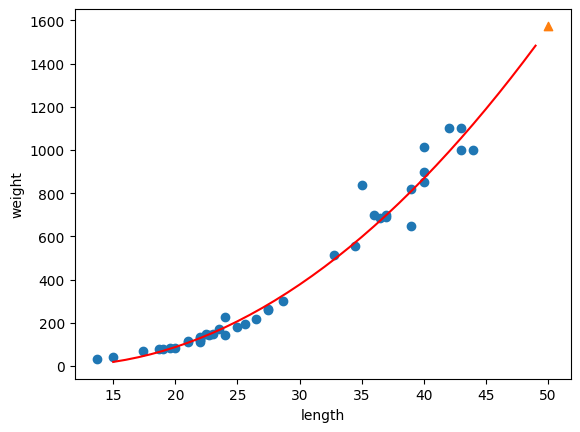

In [60]:
#구간별 직선을 그리기 위해 15에서 49까지의 정수배열 만듬
point = np.arange(15,50)

#훈련세트의 산점도
plt.scatter(train_input,train_target)

# 15에서 49까지 2차 방정식 그래프 그리기
plt.plot(point, 1.01 *point**2 -21.6 *point +116.05, color = "red")

#50cm 농어데이터
plt.scatter(50,1573.98, marker="^")
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [61]:
# 훈련 세트와 테스트 세트의 대한 R**2 점수 확인
print(lr.score(train_poly,train_target))
print(lr.score(test_poly, test_target))

#훈련세트와 테스트 세트에 대한 점수가 높아짐
#하지만 여전히 테스트 세트의 점수가 높아 과소적합 -> 좀더 복잡한 모델이 필요!

0.9706807451768623
0.9775935108325122
